# **Packages 📚**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import missingno
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score,coverage_error
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Data Preprocessing**

In [ ]:
#Load data
from google.colab import drive
drive.mount('drive', force_remount=True)

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/everydayhealth_scraped_data.csv')
print(df.shape)
df.head(5)

Mounted at drive
(126, 28)


,keyword,rank,title,snippet,link,total_words,h1_num,h1_len,h2_num,h2_len,...,h2_kcount,h3_kcount,p_kcount,a_kcount,footer_kcount,link_kcount,imalt_kcount,meta_desc_len,meta_kcount,ti_used
0,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,3,The 9 Best Breakfasts for People on Weight Los...,NaN,https://www.everydayhealth.com/diet-nutrition/...,3096,1,10.0,13,4.46,...,{'breakfast': 1},{'10': 2},"{'easy': 1, '10': 1, 'breakfast': 13, 'diabete...","{'2': 2, '10': 2, 'type': 2, 'diabetes': 3}",{'2': 1},NaN,{'breakfast': 3},10,{'for': 1},1
1,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,4,11 Diabetes Superfoods for a Type 2 Diabetes Diet,NaN,https://www.everydayhealth.com/type-2-diabetes...,3642,1,9.0,18,7.06,...,"{'2': 2, 'type': 2, 'diabetes': 2}","{'2': 9, '10': 1, 'type': 9, 'diabetes': 11}","{'easy': 1, '10': 6, 'breakfast': 2, 'diabetes...","{'easy': 1, '10': 4, 'diabetes': 22, 'type': 1...",{'2': 1},"{'2': 1, 'type': 1, 'diabetes': 2}","{'2': 6, 'type': 6, 'diabetes': 8}",9,"{'2': 1, 'for': 1, 'diabetes': 2, 'type': 1}",1
2,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,5,20 Easy and Quick Snack Ideas for People With ...,NaN,https://www.everydayhealth.com/type-2-diabetes...,3892,1,10.0,27,6.33,...,"{'2': 3, 'type': 3, 'diabetes': 4}","{'2': 7, '10': 2, 'type': 7, 'diabetes': 11}","{'easy': 3, 'breakfast': 2, 'diabetes': 32, 't...","{'2': 11, '10': 1, 'type': 11, 'diabetes': 22}",{'2': 1},"{'2': 1, 'type': 1, 'diabetes': 2}","{'2': 2, '10': 2, 'type': 2, 'diabetes': 7}",11,{'for': 1},1
3,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,6,"Condition Kitchen: 3 Easy, Feel-Good Recipes f...",NaN,https://www.everydayhealth.com/type-2-diabetes...,1454,1,12.0,9,5.33,...,"{'2': 4, 'easy': 1, 'diabetes': 4, 'type': 4}","{'2': 1, '10': 1, 'type': 1, 'diabetes': 3}","{'easy': 2, 'diabetes': 7, 'type': 4, 'ideas':...","{'easy': 1, 'diabetes': 3, 'type': 3, 'ideas':...",{'2': 1},"{'2': 2, 'easy': 1, 'diabetes': 2, 'type': 2}","{'2': 3, '10': 2, 'type': 3, 'diabetes': 7}",10,"{'for': 1, 'easy': 1, 'diabetes': 1, 'type': 1...",1
4,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,7,7 Healthy Meal Tips for Type 2 Diabetes,NaN,https://www.everydayhealth.com/type-2-diabetes...,2410,1,8.0,11,7.36,...,"{'2': 3, 'type': 2, 'diabetes': 3}","{'2': 6, '10': 1, 'type': 6, 'diabetes': 8}","{'easy': 2, 'diabetes': 25, 'type': 8, 'ideas'...","{'easy': 1, '10': 1, 'diabetes': 19, 'type': 9...",{'2': 1},"{'2': 2, 'type': 2, 'diabetes': 2}",{'diabetes': 2},7,"{'2': 1, 'for': 1, 'diabetes': 1, 'type': 1}",1


In [ ]:
#Num of keywords
keywords = df['keyword'].unique()
print('The number of keywords: ', len(keywords))

The number of keywords:  77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   keyword        126 non-null    object 
 1   rank           126 non-null    int64  
 2   title          126 non-null    object 
 3   snippet        0 non-null      float64
 4   link           126 non-null    object 
 5   total_words    126 non-null    int64  
 6   h1_num         126 non-null    int64  
 7   h1_len         123 non-null    float64
 8   h2_num         126 non-null    int64  
 9   h2_len         122 non-null    float64
 10  h3_num         126 non-null    int64  
 11  h3_len         121 non-null    float64
 12  header_total   126 non-null    int64  
 13  img_count      126 non-null    int64  
 14  internalLinks  126 non-null    int64  
 15  externalLinks  126 non-null    int64  
 16  total_link     126 non-null    int64  
 17  h1_kcount      101 non-null    object 
 18  h2_kcount 

In [ ]:
print(df.columns)

Index(['keyword', 'rank', 'title', 'snippet', 'link', 'total_words', 'h1_num',
       'h1_len', 'h2_num', 'h2_len', 'h3_num', 'h3_len', 'header_total',
       'img_count', 'internalLinks', 'externalLinks', 'total_link',
       'h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount',
       'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_desc_len',
       'meta_kcount', 'ti_used'],
      dtype='object')


In [ ]:
df.duplicated().sum()

0

In [ ]:
2# Num of results scraped for each keyword (due to security threat like Ddos some web might prevent us from scraping -> skip dat web)
grouped_df = df.groupby('keyword')
for k in keywords:
  print(k, ' : ', grouped_df.get_group(k).shape[0])

10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com  :  10
10 Home Remedies for Menstrual or Period Cramp Relief everydayhealth.com  :  1
10 Iron-Packed Foods for Combating Anemia and Low Energy everydayhealth.com  :  1
10 Surprising Causes of Blood Sugar Swings everydayhealth.com  :  1
5 Drinks That Can Increase Your Gout Risk everydayhealth.com  :  1
7 Ways to Get Rid of Hyperpigmentation everydayhealth.com  :  1
8 Healthy Carbs for Diabetes everydayhealth.com  :  1
8 Healthy High-Protein Snacks to Help You Power Through the Day everydayhealth.com  :  11
9 Common Digestive Conditions From Top to Bottom everydayhealth.com  :  1
ADHD in Adults: Symptoms, Diagnosis, and Treatment everydayhealth.com  :  11
Allergy-Friendly Recipes: Easy and Safe Dishes everydayhealth.com  :  1
Apple Cider Vinegar Guide: Nutrition, Benefits, Side Effects, More everydayhealth.com  :  1
Arthritis Pain Relief: Treatments and Techniques everydayhealth.com  :  1
Avocados 101: Nutrition Facts, Health

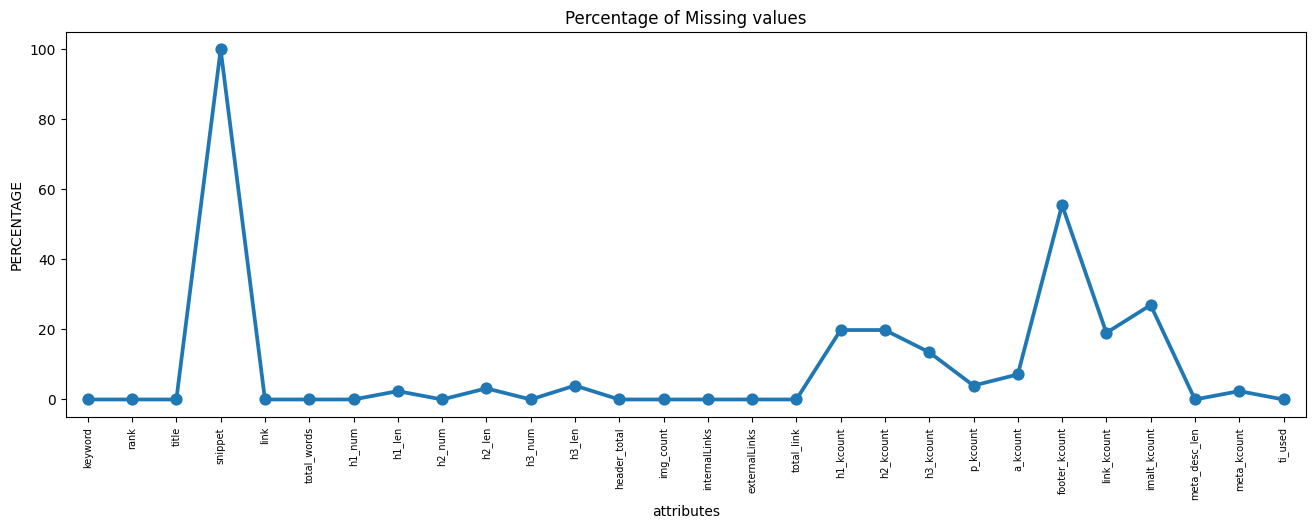

In [ ]:
# Assuming df is your DataFrame
# Visualizing the percentage of missing values:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['attributes', 'percent_missing']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='attributes', y='percent_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#Take out columns that are stored in dict format
kcount = []
for c in df.columns:
  if "kcount" in c:
    kcount.append(c)

print(kcount)

['h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount', 'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_kcount']


In [ ]:
# Change the data from those columns to the sum of occurence
for index, row in df.iterrows():
  for ck in kcount:
    strings = re.findall(r'\d+', str(row[ck]))
    a = [int(x) for x in strings]
    df.at[index, ck] = sum(a)

In [ ]:
#drop column sinppet
df.drop(columns= ['snippet', 'rank'], inplace=True)
df.head()

,keyword,title,link,total_words,h1_num,h1_len,h2_num,h2_len,h3_num,h3_len,...,h2_kcount,h3_kcount,p_kcount,a_kcount,footer_kcount,link_kcount,imalt_kcount,meta_desc_len,meta_kcount,ti_used
0,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,The 9 Best Breakfasts for People on Weight Los...,https://www.everydayhealth.com/diet-nutrition/...,3096,1,10.0,13,4.46,40,3.88,...,1,12,45,21,3,0,3,10,1,1
1,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,11 Diabetes Superfoods for a Type 2 Diabetes Diet,https://www.everydayhealth.com/type-2-diabetes...,3642,1,9.0,18,7.06,20,8.90,...,8,42,136,70,3,6,22,9,7,1
2,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,20 Easy and Quick Snack Ideas for People With ...,https://www.everydayhealth.com/type-2-diabetes...,3892,1,10.0,27,6.33,20,9.40,...,12,39,61,57,3,6,25,11,1,1
3,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,"Condition Kitchen: 3 Easy, Feel-Good Recipes f...",https://www.everydayhealth.com/type-2-diabetes...,1454,1,12.0,9,5.33,16,5.31,...,15,18,20,13,3,9,27,10,7,1
4,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,7 Healthy Meal Tips for Type 2 Diabetes,https://www.everydayhealth.com/type-2-diabetes...,2410,1,8.0,11,7.36,12,10.25,...,10,33,47,52,3,8,2,7,6,1


In [ ]:
df.head(5)

,keyword,title,link,total_words,h1_num,h1_len,h2_num,h2_len,h3_num,h3_len,...,h2_kcount,h3_kcount,p_kcount,a_kcount,footer_kcount,link_kcount,imalt_kcount,meta_desc_len,meta_kcount,ti_used
0,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,The 9 Best Breakfasts for People on Weight Los...,https://www.everydayhealth.com/diet-nutrition/...,3096,1,10.0,13,4.46,40,3.88,...,1,12,45,21,3,0,3,10,1,1
1,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,11 Diabetes Superfoods for a Type 2 Diabetes Diet,https://www.everydayhealth.com/type-2-diabetes...,3642,1,9.0,18,7.06,20,8.90,...,8,42,136,70,3,6,22,9,7,1
2,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,20 Easy and Quick Snack Ideas for People With ...,https://www.everydayhealth.com/type-2-diabetes...,3892,1,10.0,27,6.33,20,9.40,...,12,39,61,57,3,6,25,11,1,1
3,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,"Condition Kitchen: 3 Easy, Feel-Good Recipes f...",https://www.everydayhealth.com/type-2-diabetes...,1454,1,12.0,9,5.33,16,5.31,...,15,18,20,13,3,9,27,10,7,1
4,10 Easy Breakfast Ideas for Type 2 Diabetes ev...,7 Healthy Meal Tips for Type 2 Diabetes,https://www.everydayhealth.com/type-2-diabetes...,2410,1,8.0,11,7.36,12,10.25,...,10,33,47,52,3,8,2,7,6,1


# **EXPLORATION DATA ANALYSIS**

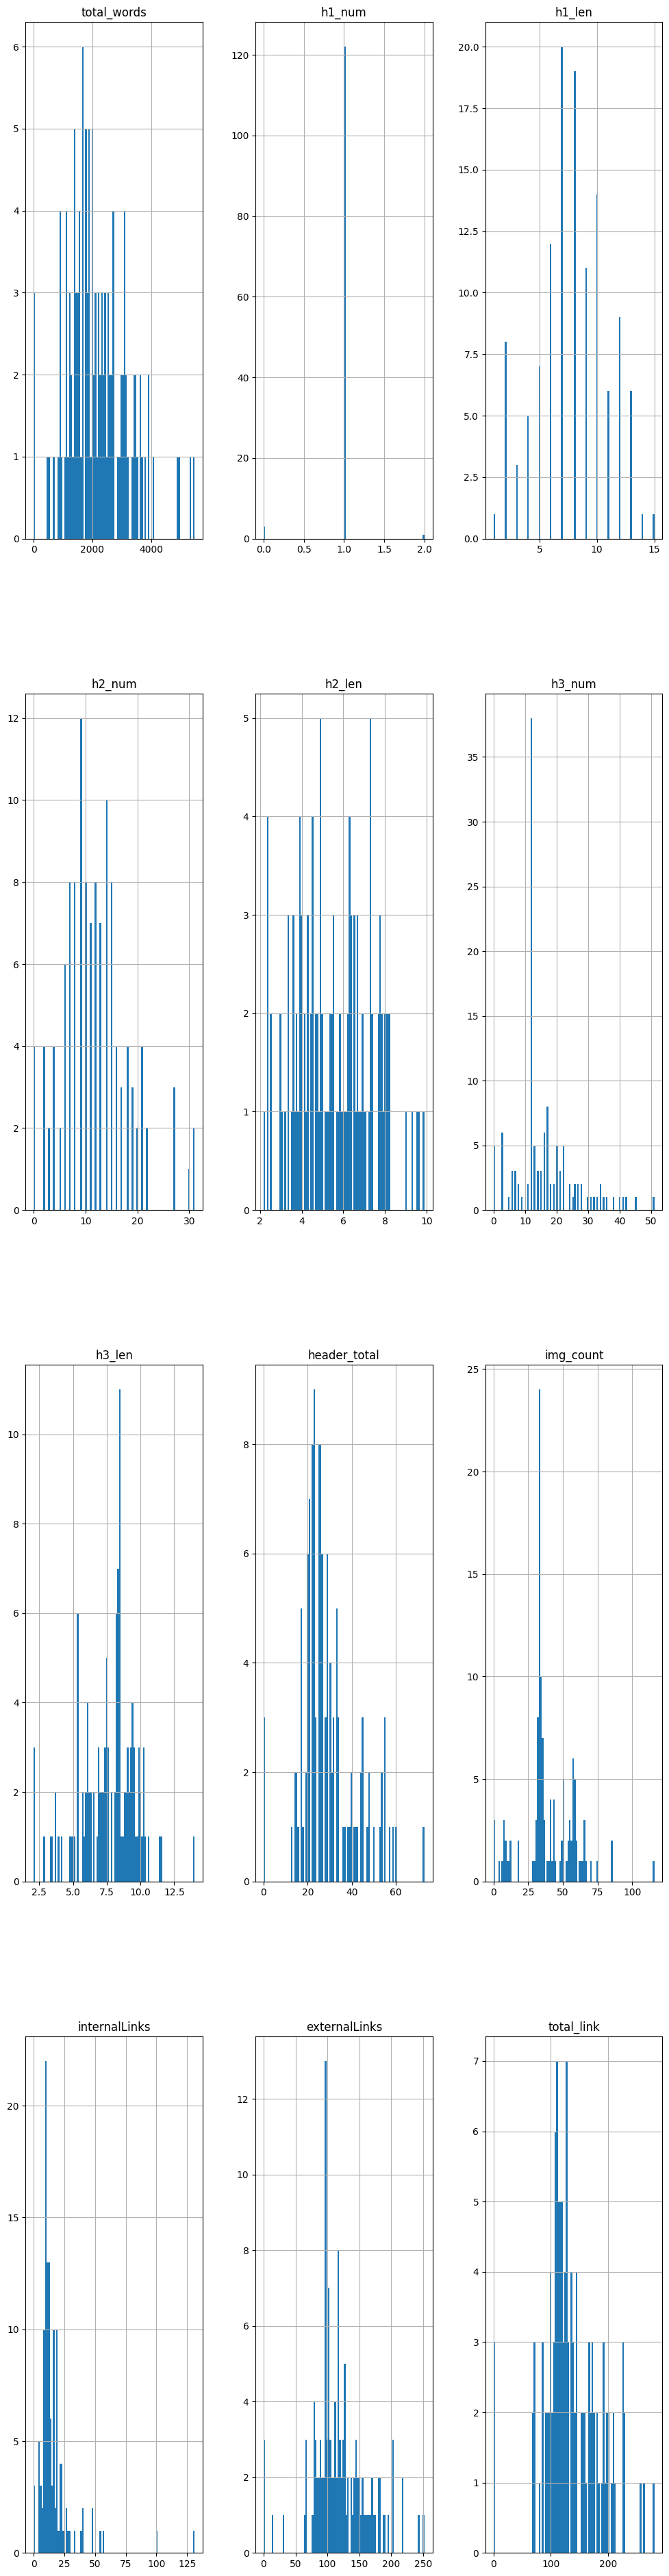

In [ ]:
# Histogram for all columns
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df.select_dtypes(include=np.number).columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.select_dtypes(include=np.number).columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
#Fill all missing values from feature columns with 0
df[['h1_len','h2_len','h3_len']] = df[['h1_len','h2_len','h3_len']].fillna(0)
df.isnull().sum()

keyword          0
title            0
link             0
total_words      0
h1_num           0
h1_len           0
h2_num           0
h2_len           0
h3_num           0
h3_len           0
header_total     0
img_count        0
internalLinks    0
externalLinks    0
total_link       0
h1_kcount        0
h2_kcount        0
h3_kcount        0
p_kcount         0
a_kcount         0
footer_kcount    0
link_kcount      0
imalt_kcount     0
meta_desc_len    0
meta_kcount      0
ti_used          0
dtype: int64

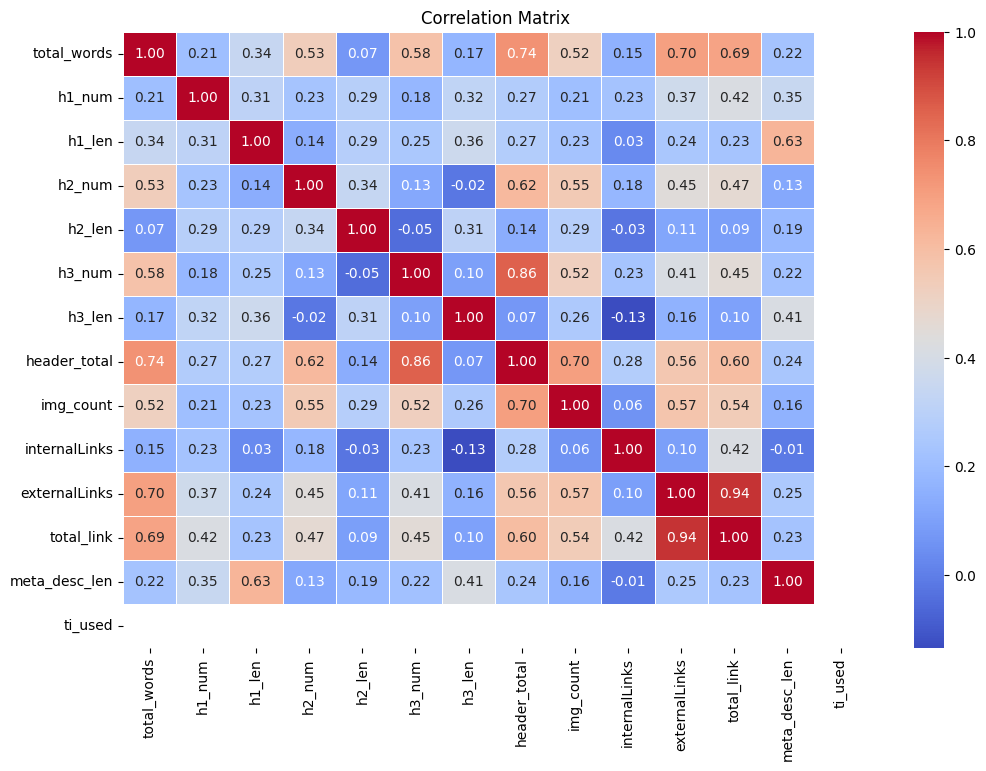

In [ ]:
import seaborn as sns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **MODEL BUILDING**

In [ ]:
# Change the dataframe index to keyword
train_processed = df.copy()
train_processed.set_index("keyword",inplace=True)
train_processed.head(5)

,title,link,total_words,h1_num,h1_len,h2_num,h2_len,h3_num,h3_len,header_total,...,h2_kcount,h3_kcount,p_kcount,a_kcount,footer_kcount,link_kcount,imalt_kcount,meta_desc_len,meta_kcount,ti_used
keyword,,,,,,,,,,,,,,,,,,,,,
10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com,The 9 Best Breakfasts for People on Weight Los...,https://www.everydayhealth.com/diet-nutrition/...,3096,1,10.0,13,4.46,40,3.88,54,...,1,12,45,21,3,0,3,10,1,1
10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com,11 Diabetes Superfoods for a Type 2 Diabetes Diet,https://www.everydayhealth.com/type-2-diabetes...,3642,1,9.0,18,7.06,20,8.90,39,...,8,42,136,70,3,6,22,9,7,1
10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com,20 Easy and Quick Snack Ideas for People With ...,https://www.everydayhealth.com/type-2-diabetes...,3892,1,10.0,27,6.33,20,9.40,48,...,12,39,61,57,3,6,25,11,1,1
10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com,"Condition Kitchen: 3 Easy, Feel-Good Recipes f...",https://www.everydayhealth.com/type-2-diabetes...,1454,1,12.0,9,5.33,16,5.31,26,...,15,18,20,13,3,9,27,10,7,1
10 Easy Breakfast Ideas for Type 2 Diabetes everydayhealth.com,7 Healthy Meal Tips for Type 2 Diabetes,https://www.everydayhealth.com/type-2-diabetes...,2410,1,8.0,11,7.36,12,10.25,24,...,10,33,47,52,3,8,2,7,6,1


In [ ]:
train_processed.dtypes

title             object
link              object
total_words        int64
h1_num             int64
h1_len           float64
h2_num             int64
h2_len           float64
h3_num             int64
h3_len           float64
header_total       int64
img_count          int64
internalLinks      int64
externalLinks      int64
total_link         int64
h1_kcount         object
h2_kcount         object
h3_kcount         object
p_kcount          object
a_kcount          object
footer_kcount     object
link_kcount       object
imalt_kcount      object
meta_desc_len      int64
meta_kcount       object
ti_used            int64
dtype: object

In [ ]:
# Set features (ALL)
features = train_processed.iloc[:,4:].columns.tolist()
print(features)
print(len(features))

'''
# Set features (selected)
features = ['internalLinks', 'a_kcount', 'h2_len', 'externalLinks', 'total_words', 'img_count']
print(features)
print(len(features))
'''
# Set target
target = 'rank'

['h1_len', 'h2_num', 'h2_len', 'h3_num', 'h3_len', 'header_total', 'img_count', 'internalLinks', 'externalLinks', 'total_link', 'h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount', 'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_desc_len', 'meta_kcount', 'ti_used']
21


# **FEATURE ANAALYSIS**

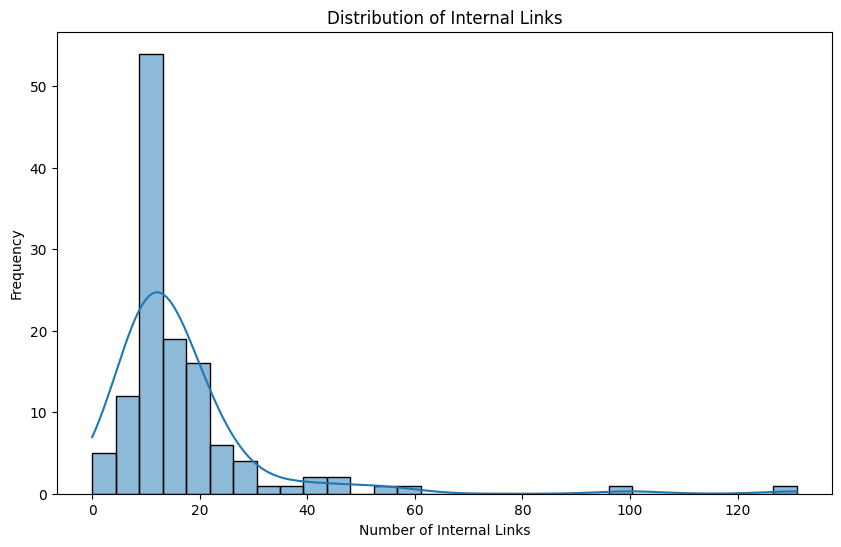

In [ ]:
# 1. Distribution of internal links
plt.figure(figsize=(10, 6))
sns.histplot(df['internalLinks'], bins=30, kde=True)
plt.title('Distribution of Internal Links')
plt.xlabel('Number of Internal Links')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 2. Average and median number of internal links
avg_internal_links = df['internalLinks'].mean()
median_internal_links = df['internalLinks'].median()
print(f'Average number of internal links: {avg_internal_links}')
print(f'Median number of internal links: {median_internal_links}')

Average number of internal links: 16.706349206349206
Median number of internal links: 12.0


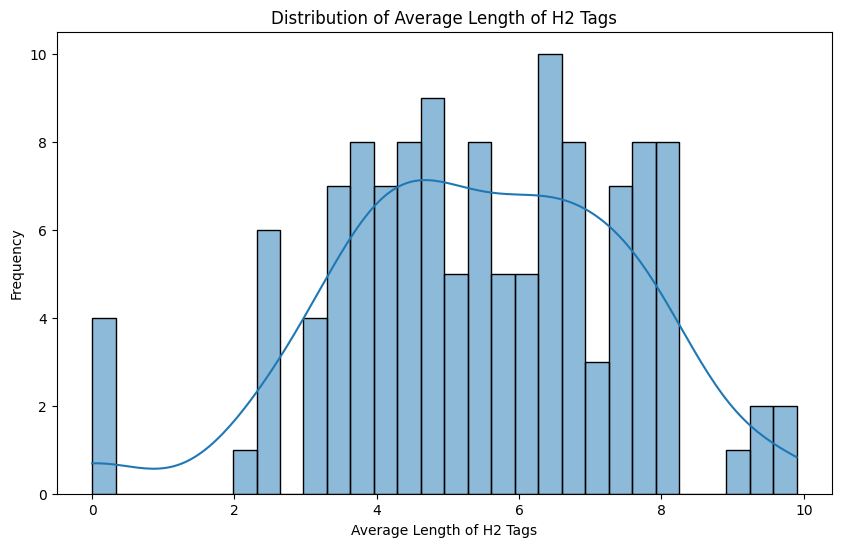

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['p_kcount'], color='viridis', palette='viridis')
plt.title('Histogram of Paragraph Keyword Counts')
plt.xlabel('Paragraph Keyword Count')
plt.show()


KeyError: "'reds' is not a known colormap name"

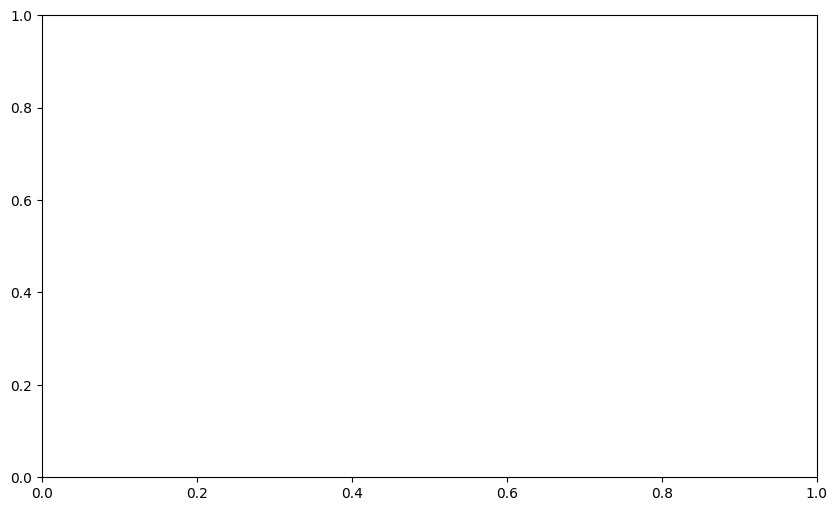

In [ ]:
plt.figure(figsize=(10, 6))
df['h2_num'].value_counts().plot(kind='bar', colormap='Oranges')
plt.title('Number of H2 Tags per Page')
plt.xlabel('Number of H2 Tags')
plt.ylabel('Frequency')
plt.show()


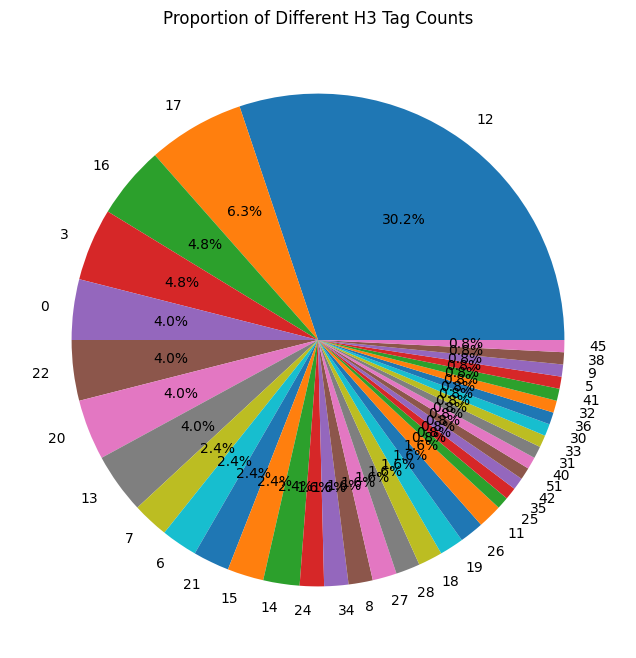

In [ ]:
plt.figure(figsize=(8, 8))
df['h3_num'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Different H3 Tag Counts')
plt.ylabel('')
plt.show()


**Internal Link**

<ipython-input-29-7e576dc62b1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='internalLinks', inner='quartile', palette='viridis')


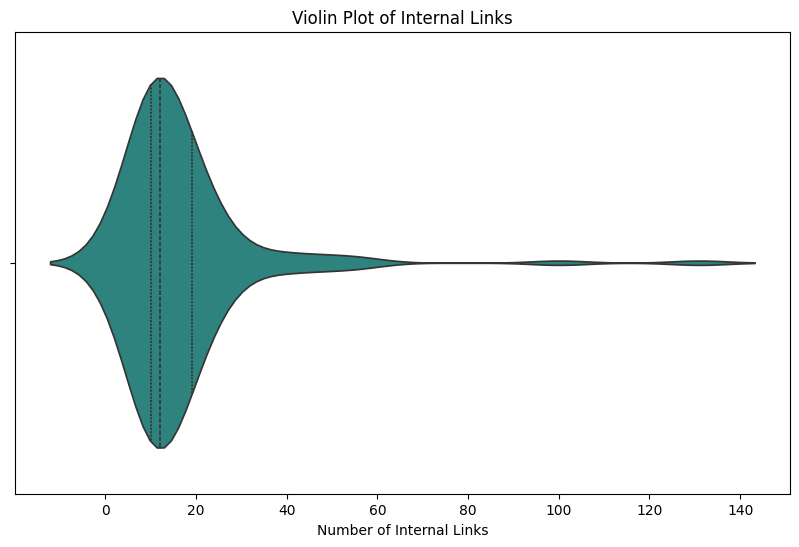

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='internalLinks', inner='quartile', palette='viridis')
plt.title('Violin Plot of Internal Links')
plt.xlabel('Number of Internal Links')
plt.show()


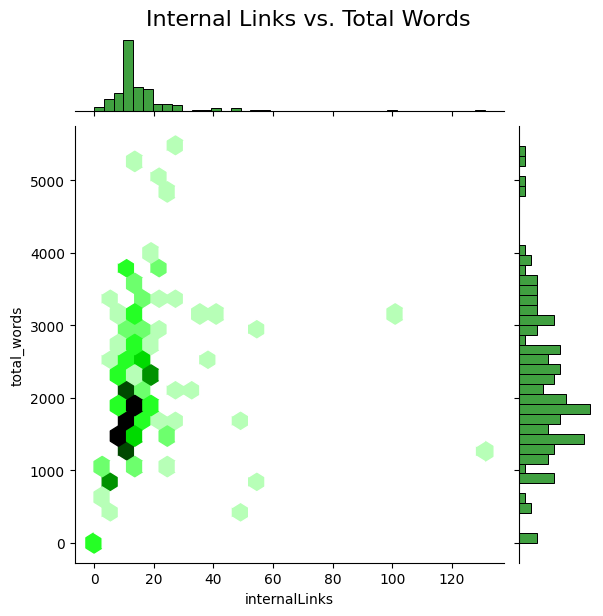

In [ ]:
sns.jointplot(x='internalLinks', y='total_words', data=df, kind='hex', color='green', marginal_kws=dict(bins=40, fill=True))
plt.suptitle('Internal Links vs. Total Words', size=16, y=1.02)
plt.show()


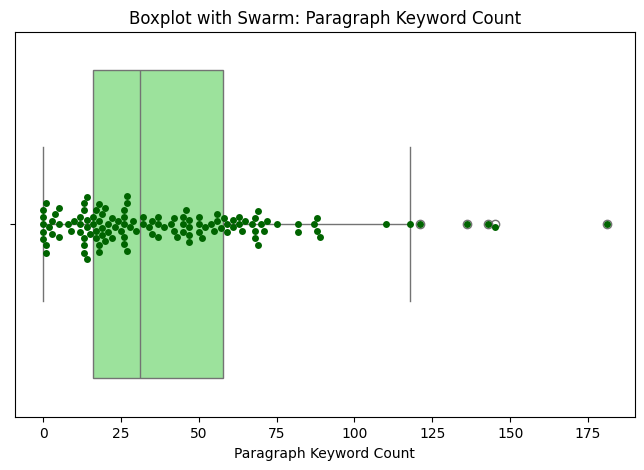

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['p_kcount'], color='lightblue')
sns.swarmplot(x=df['p_kcount'], color='darkblue')
plt.title('Boxplot with Swarm: Paragraph Keyword Count')
plt.xlabel('Paragraph Keyword Count')
plt.show()


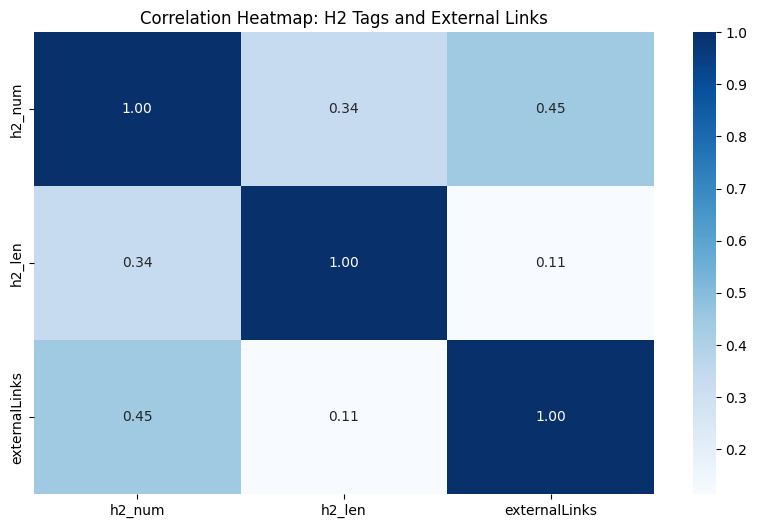

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['h2_num', 'h2_len', 'externalLinks']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap: H2 Tags and External Links')
plt.show()


<ipython-input-33-1b54a37ee56a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['h3_num'], shade=True, color="red", label='H3 Number', alpha=0.5)
<ipython-input-33-1b54a37ee56a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['h3_len'], shade=True, color="blue", label='H3 Length', alpha=0.5)


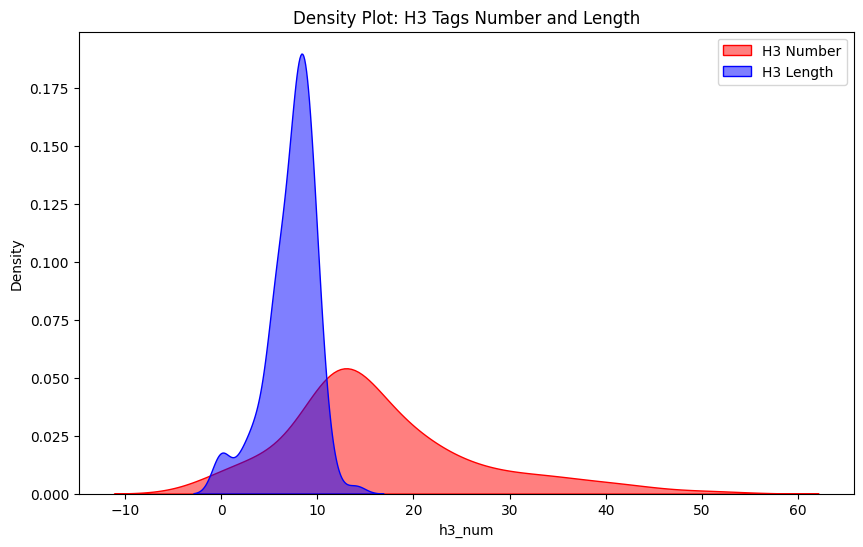

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['h3_num'], shade=True, color="red", label='H3 Number', alpha=0.5)
sns.kdeplot(df['h3_len'], shade=True, color="blue", label='H3 Length', alpha=0.5)
plt.title('Density Plot: H3 Tags Number and Length')
plt.legend()
plt.show()


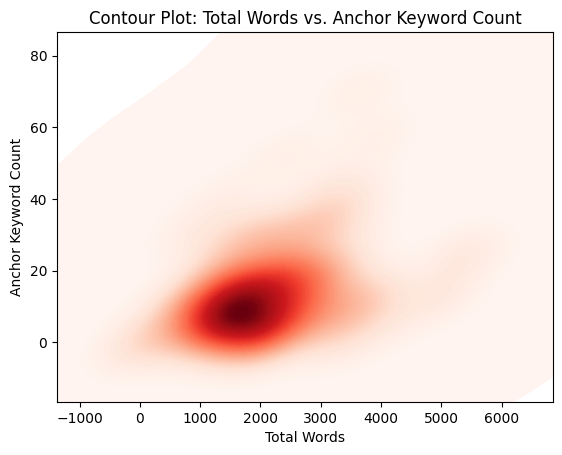

In [ ]:
sns.kdeplot(x='total_words', y='a_kcount', data=df, cmap="Reds", fill=True, thresh=0, levels=100)
plt.title('Contour Plot: Total Words vs. Anchor Keyword Count')
plt.xlabel('Total Words')
plt.ylabel('Anchor Keyword Count')
plt.show()


<ipython-input-35-b6cb14053d77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word_ranges', y='img_count', data=df, palette='coolwarm')


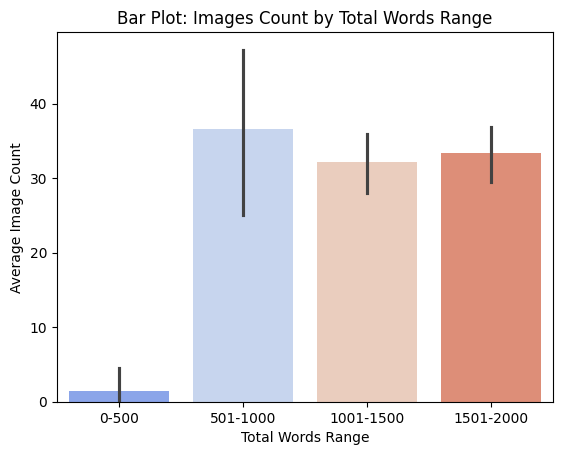

In [ ]:
df['word_ranges'] = pd.cut(df['total_words'], bins=[0, 500, 1000, 1500, 2000], labels=['0-500', '501-1000', '1001-1500', '1501-2000'])
sns.barplot(x='word_ranges', y='img_count', data=df, palette='coolwarm')
plt.title('Bar Plot: Images Count by Total Words Range')
plt.xlabel('Total Words Range')
plt.ylabel('Average Image Count')
plt.show()


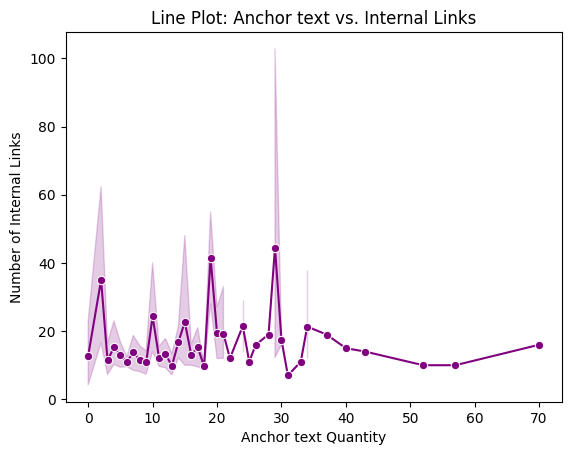

In [ ]:
sns.lineplot(x='a_kcount', y='internalLinks', data=df, marker='o', linestyle='-', color='purple')
plt.title('Line Plot: Anchor text vs. Internal Links')
plt.xlabel('Anchor text Quantity')
plt.ylabel('Number of Internal Links')
plt.show()


# **Paragraph keyword count and Anchor keyword count**

In [ ]:
#How does paragraph keyword count vary across different ranking levels?
sns.barplot(x='rank', y='p_kcount', data=df)
plt.title('Average Paragraph Keyword Count by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Paragraph Keyword Count')
plt.show()

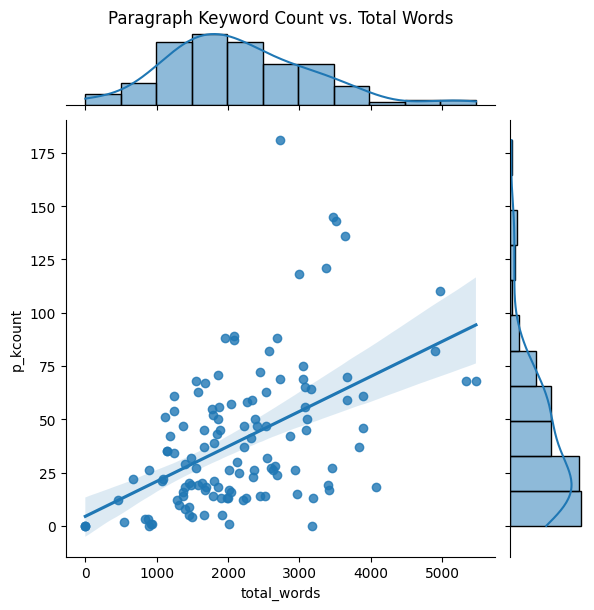

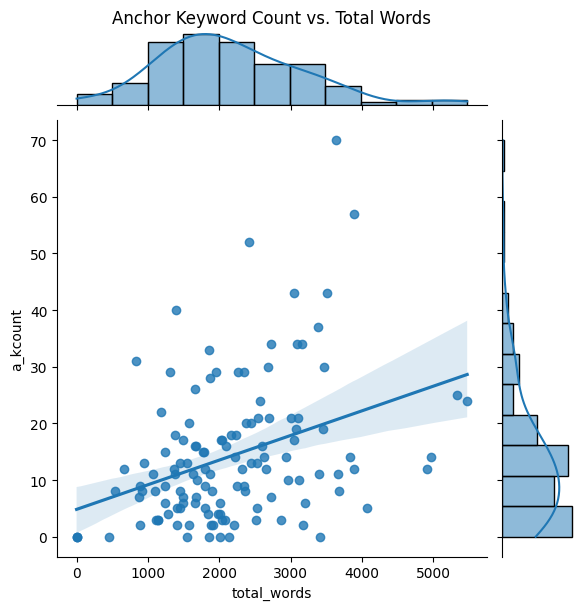

In [ ]:
# Convert p_kcount and a_kcount to numeric, setting errors='coerce' to handle non-numeric data
df['p_kcount'] = pd.to_numeric(df['p_kcount'], errors='coerce')
df['a_kcount'] = pd.to_numeric(df['a_kcount'], errors='coerce')

# Fill any resulting NaN values with 0 (or another appropriate value depending on your data)
df['p_kcount'].fillna(0, inplace=True)
df['a_kcount'].fillna(0, inplace=True)

# Now retry the joint plots
sns.jointplot(x='total_words', y='p_kcount', data=df, kind='reg')
plt.title('Paragraph Keyword Count vs. Total Words', pad=70)
plt.show()

sns.jointplot(x='total_words', y='a_kcount', data=df, kind='reg')
plt.title('Anchor Keyword Count vs. Total Words', pad=70)
plt.show()


Text(0.5, 1.0, 'Correlation matrix heatmap')

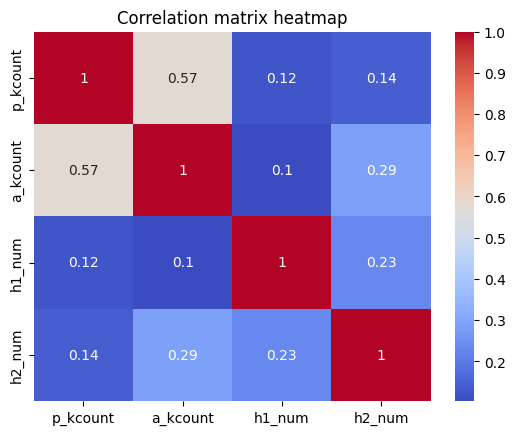

In [ ]:
features_to_analyze = ['p_kcount', 'a_kcount', 'h1_num', 'h2_num']
corr_matrix = df[features_to_analyze].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')


# **Number of H2 tags and Length of H2 tags**

In [ ]:
#Average Number of H2 Tags by Ranking
avg_h2_num = df.groupby['h2_num'].mean()
sns.barplot(x=avg_h2_num.index, y=avg_h2_num.values, palette='coolwarm')
plt.title('Average Number of H2 Tags by Ranking')
plt.xlabel('Rank')
plt.ylabel('Average Number of H2 Tags')
plt.gca().invert_xaxis()
plt.show()

TypeError: 'method' object is not subscriptable

In [ ]:
#Distribution of H2 Tag Lengths by Ranking
sns.violinplot(x='rank', y='h2_len', data=df, palette='viridis')
plt.title('Distribution of H2 Tag Lengths by Rank')
plt.xlabel('Rank')
plt.ylabel('H2 Tag Length')
plt.show()

In [ ]:
avg_h2_len = df.groupby('rank')['h2_len'].mean()
sns.lineplot(x=avg_h2_len.index, y=avg_h2_len.values)
plt.title('Average Length of H2 Tags by Ranking')
plt.xlabel('Rank')
plt.ylabel('Average Length of H2 Tags')
plt.gca().invert_xaxis()
plt.show()

In [ ]:
df['content_length_category'] = pd.qcut(df['total_words'], 4, labels=['Short', 'Medium', 'Long', 'Very Long'])
mean_h2_len = df.groupby('content_length_category')['h2_len'].mean()
sns.barplot(x=mean_h2_len.index, y=mean_h2_len.values, palette='magma')
plt.title('Average H2 Tag Length by Content Length Category')
plt.xlabel('Content Length Category')
plt.ylabel('Average H2 Tag Length')
plt.show()

# **Others**

In [ ]:
#Average H3 Tag Length by Rank
avg_h3_len = df.groupby('rank')['h3_len'].mean()
sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')
plt.title('Average H3 Tag Length by Rank')
plt.xlabel('Rank')
plt.ylabel('Average H3 Tag Length')
plt.gca().invert_xaxis()
plt.show()


In [ ]:
#Average Image by Rank
avg_h3_len = df.groupby('rank')['img_count'].mean()
sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')
plt.title('Average Image Quantity by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Image')
plt.gca().invert_xaxis()
plt.show()


In [ ]:
#Meta Description Length Across Ranks
avg_meta_desc_len = df.groupby('rank')['meta_desc_len'].mean()
sns.barplot(x=avg_meta_desc_len.index, y=avg_meta_desc_len.values, palette='coolwarm')
plt.title('Meta Description Length Across Ranks')
plt.xlabel('Rank')
plt.ylabel('Average Meta Description Length')
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#External Links Across Ranks
avg_externalLinks = df.groupby('rank')['externalLinks'].mean()
sns.barplot(x=avg_externalLinks.index, y=avg_externalLinks.values, palette='coolwarm')
plt.title('External Links Across Ranks')
plt.xlabel('Rank')
plt.ylabel('Average External Links')
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#Stacked Bar Chart of H1, H2, H3 Tag Usage
grouped = df.groupby('rank').agg({'h1_len': 'mean', 'h2_len': 'mean', 'h3_len': 'mean'})
grouped.plot(kind='bar', stacked=True, colormap='autumn')
plt.title('Stacked Bar Chart of H1, H2, H3 Tag Usage by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Length')
plt.show()

In [ ]:
#Line Chart of Meta Keyword Count Trends
sns.lineplot(x='rank', y='meta_kcount', data=df, marker='o', linestyle='-', color='purple')
plt.title('Trend of Meta Keyword Count by Rank')
plt.xlabel('Rank')
plt.ylabel('Meta Keyword Count')
plt.gca().invert_xaxis()
plt.show()